# Planteamiento del problema

Una corriente de aire y $\textrm{SO}_{2}$ (presión parcial del $\textrm{SO}_{2}$ en el aire = 4 kPa) se quiere purificar mediante una
columna de pared mojada por la que fluye agua (inicialmente libre de $\textrm{SO}_{2}$). El sistema opera a $30$ °C y $1$
atm de presión.

El flujo de gas ($\textrm{SO}_{2}$/aire) es de 0,037 $\textrm{m}^3/\textrm{s}$ a las condiciones dadas y se quiere eliminar el 90 % del $\textrm{SO}_{2}$ presente en el aire.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

En la tabla siguiente se muestran los valores de equilibrio para el amoniaco en el sistema aire/agua.

In [2]:
# Cargar datos
df=pd.read_excel('datos/DatosE1.xlsx')
df

,g SO2/100 g H2O,Presión parcial de SO2/kPa
0,0.010,0.016
1,0.055,0.224
2,0.100,0.616
3,0.150,1.076
4,0.200,1.573
5,0.250,2.093
6,0.300,2.640
7,0.400,3.773
8,0.500,4.946
9,1.000,11.159


## Análisis preliminar

**Variables conocidas**
-  Flujo de aire.
-  Composición de ingreso del aire.
-  Composición de salida del aire.
-  Composición de ingreso del agua.
-  Presión y temperatura de operación del sistema.

**Variables desconocidas**
-  Flujo de agua.
-  Diámetro y altura de la torre.

**Parámetros del estudio**

Obtenidos de las referencias (Yongtao _et al_, 2015), (Barbooti _et al_, 2011), (Green $\&$ Southard, 2019) y (Perry _et al_, 1997).
- Densidad del gas ($\rho_g$): $1.21\textrm{ kg/m}^3$
- Densidad del agua ($\rho_w$): $997\textrm{ kg/m}^3$
- Viscosidad del gas ($\mu_g$): $1.75\times10^{-5}\textrm{ Pa s}$
- Viscosidad del agua ($\mu_w$): $1.0 \times 10^{-3}\textrm{ Pa s}$
- Difusividad del gas ($D_g$): $1.23\times10^{-5}\textrm{ m}^2/\textrm{s}$
- Difusividad del líquido ($D_L$): $1.7\times10^{-9}\textrm{ m}^2/\textrm{s}$
- Gravedad ($g$): $9.81\textrm{ m/s}^2$
- Temperatura (T): $303.15\textrm{ K}$

# Pregunta 1

## Número de Reynolds

Dimensione una columna de pared mojada que cumpla con lo solicitado. Para ello calcule el diámetro, la altura y el flujo de agua que se requiere.

Se toma la expresión del área lateral de la columna ($A_{t}$) en función del diámetro:

$$A_{t}=\frac{\pi D^2}{4}$$

Y sustituyendo en la expresión del flujo, se puede obtener la velocidad:

$$\dot{V}=vA_{t}$$
$$v=\frac{\dot{V}}{A_{t}}$$
$$v=\frac{4\dot{V}}{\pi D^2}$$

Teniendo la velocidad $v$, se puede sustituir en la expresión del número de Reynolds del gas ($R_{e,g}$):

$$R_{e,g}=\frac{v\rho_{g}D}{\mu_{g}}$$
$$\Rightarrow R_{e,g}=\frac{\frac{4\dot{V}}{\pi D^2}\rho_{g}D}{\mu_{g}}$$
$$\Rightarrow R_{e,g}=\frac{4\dot{V}\rho_{g}}{\pi\mu_{g}D}$$

Ahora se puede observar la forma la variación de $R_{e,g}$ en función del diámetro $D$.

In [3]:
# Parámetros del gas

rhog=1.21 # kg/m^3
mug=1.75e-5 # Pa s
Dg=1.23e-5 # m^2/s
dotV=0.037 # m^3/s
PSO2_in=4 # kPa

# Parámetros del líquido
rhol=997 # kg/m^3
mul=1e-3 # Pa*s
Dl=1.7e-9 # m^2/s

# Parámetros globales

g=9.81 # m/s^2
T=303.15 # K
R=8.314 # Pa*m^3*mol^-1*K^-1

In [4]:
# Función Número de Reynolds del Gas
def Reg(D):
    '''
    Función que calcula el número de Reynolds del gas para un diámetro dado.
    '''
    return 4*dotV*rhog/(np.pi*mug*D)

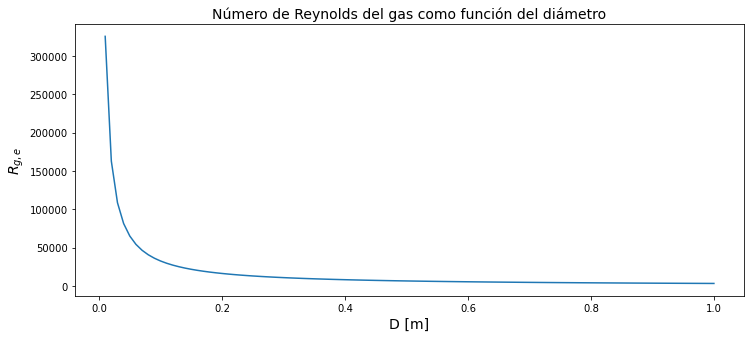

In [5]:
# Arreglo de diámetros
D=np.arange(0.01,1.01,0.01)

# Gráfica
plt.figure(figsize=(12,5))
plt.plot(D,Reg(D))
plt.xlabel('D [m]', fontsize=14)
plt.ylabel(r'$R_{g,e}$', fontsize=14)
plt.title('Número de Reynolds del gas como función del diámetro', fontsize=14)
plt.show()

In [6]:
Reg(0.35)

9306.601537598895

Se tomará un nvalor del diámetro de $0.35$ m, que da un valor de número de Reynolds de $9306.6$.

## Flujos

Ahora, se inicia asumiendo que el gas de aire y $\textrm{SO}_{2}$ se comporta como un gas ideal, por lo que se puede despejar para el flujo molar de entrada $\dot{J}_{\textrm{SO}_{2}}^{in}$:

$$P_{\textrm{SO}_{2}}^{in}\dot{V}=\dot{J}_{\textrm{SO}_{2}}^{in}RT$$

Con $R=8.314\textrm{ Pa m}^3\textrm{ mol}^{-1}\textrm{ K}^{-1}$, entonces:

$$\dot{J}_{\textrm{SO}_{2}}^{in}=\frac{P_{\textrm{SO}_{2}}^{in}\dot{V}}{RT}$$
$$\Rightarrow \dot{J}_{\textrm{SO}_{2}}^{in}=0.05872\textrm{ mol/s}$$

Como se desea transferir el $90\%$, entonces se obtiene el $90\%$ de $\dot{J}_{\textrm{SO}_{2}}^{in}$, que es:

$$\dot{J}_{\textrm{SO}_{2}}^{T}=0.9\cdot \dot{J}_{\textrm{SO}_{2}}^{in}$$
$$\Rightarrow \dot{J}_{\textrm{SO}_{2}}^{T}=0.05285\textrm{ mol/s}$$

Y por tanto, se puede determinar el flujo de salida:

$$\dot{J}_{\textrm{SO}_{2}}^{out}=\dot{J}_{\textrm{SO}_{2}}^{in}-\dot{J}_{\textrm{SO}_{2}}^{T}$$
$$\Rightarrow \dot{J}_{\textrm{SO}_{2}}^{out}=0.00587\textrm{ mol/s}$$

Tomando nuevamente la ecuación del gas idea, se puede calcular la presión parcial del $\textrm{SO}_{2}$ a la salida de la columna:

$$P_{\textrm{SO}_{2}}^{out}\dot{V}=\dot{J}_{\textrm{SO}_{2}}^{out}RT$$
$$\Rightarrow P_{\textrm{SO}_{2}}^{out}=\frac{\dot{J}_{\textrm{SO}_{2}}^{out}RT}{\dot{V}}$$
$$\Rightarrow P_{\textrm{SO}_{2}}^{out}=399.88\textrm{ Pa}$$

### Flujo de agua

Recordando que:

- Masa molar del $\textrm{SO}_2=0.0641\textrm{ kg mol}$
- Masa molar del $\textrm{H}_2\textrm{O}=0.0180\textrm{ kg mol}$

Se pueden calcular las fracciones molares de los compuestos a partir de la tabla anterior

In [7]:
df['Masa SO2 (kg)']=df['g SO2/100 g H2O']/1000
df['Masa H20 (kg)']=np.zeros_like(df['Masa SO2 (kg)'])+100/1000
df['Moles de SO2 (mol)']=df['Masa SO2 (kg)']/0.0641
df['Moles de H2O (mol)']=df['Masa H20 (kg)']/0.0180
df['Fracción molar de SO2']=df['Moles de SO2 (mol)']/(df['Moles de SO2 (mol)']+df['Moles de H2O (mol)'])
df

,g SO2/100 g H2O,Presión parcial de SO2/kPa,Masa SO2 (kg),Masa H20 (kg),Moles de SO2 (mol),Moles de H2O (mol),Fracción molar de SO2
0,0.010,0.016,0.000010,0.1,0.000156,5.555556,0.000028
1,0.055,0.224,0.000055,0.1,0.000858,5.555556,0.000154
2,0.100,0.616,0.000100,0.1,0.001560,5.555556,0.000281
3,0.150,1.076,0.000150,0.1,0.002340,5.555556,0.000421
4,0.200,1.573,0.000200,0.1,0.003120,5.555556,0.000561
5,0.250,2.093,0.000250,0.1,0.003900,5.555556,0.000702
6,0.300,2.640,0.000300,0.1,0.004680,5.555556,0.000842
7,0.400,3.773,0.000400,0.1,0.006240,5.555556,0.001122
8,0.500,4.946,0.000500,0.1,0.007800,5.555556,0.001402
9,1.000,11.159,0.001000,0.1,0.015601,5.555556,0.002800


Ahora, como se conocen las fracciones molares de $\textrm{SO}_{2}$, se puede proceder a calcular el flujo, en $\textrm{mol/s}$ de agua. Partiendo de que:

$$\dot{J}_{\textrm{SO}_{2}}^{T}=x_{\textrm{SO}_{2}}\cdot M_{\textrm{SOL}}^{out}$$
$$\Rightarrow M_{\textrm{SOL}}^{out}=\frac{\dot{J}_{\textrm{SO}_{2}}^{T}}{x_{\textrm{SO}_{2}}}$$

Además, el flujo de agua vendrá dado por:

$$\dot{J}_{\textrm{H}_{2}\textrm{O}}=M_{\textrm{SOL}}^{out}-\dot{J}_{\textrm{SO}_{2}}^{T}$$

In [8]:
df['Flujo total (mol/s)']=0.05285/df['Fracción molar de SO2']
df['Flujo de agua (mol/s)']=df['Flujo total (mol/s)']-0.05285
df

,g SO2/100 g H2O,Presión parcial de SO2/kPa,Masa SO2 (kg),Masa H20 (kg),Moles de SO2 (mol),Moles de H2O (mol),Fracción molar de SO2,Flujo total (mol/s),Flujo de agua (mol/s)
0,0.010,0.016,0.000010,0.1,0.000156,5.555556,0.000028,1882.100072,1882.047222
1,0.055,0.224,0.000055,0.1,0.000858,5.555556,0.000154,342.243254,342.190404
2,0.100,0.616,0.000100,0.1,0.001560,5.555556,0.000281,188.257572,188.204722
3,0.150,1.076,0.000150,0.1,0.002340,5.555556,0.000421,125.522665,125.469815
4,0.200,1.573,0.000200,0.1,0.003120,5.555556,0.000561,94.155211,94.102361
5,0.250,2.093,0.000250,0.1,0.003900,5.555556,0.000702,75.334739,75.281889
6,0.300,2.640,0.000300,0.1,0.004680,5.555556,0.000842,62.787757,62.734907
7,0.400,3.773,0.000400,0.1,0.006240,5.555556,0.001122,47.104031,47.051181
8,0.500,4.946,0.000500,0.1,0.007800,5.555556,0.001402,37.693794,37.640944
9,1.000,11.159,0.001000,0.1,0.015601,5.555556,0.002800,18.873322,18.820472


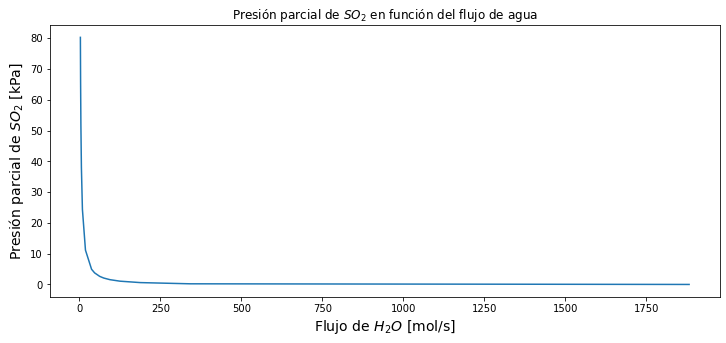

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['Flujo de agua (mol/s)'],df['Presión parcial de SO2/kPa'])
plt.ylabel(r'Presión parcial de $SO_2$ [kPa]',fontsize=14)
plt.xlabel(r'Flujo de $H_2O$ [mol/s]',fontsize=14)
plt.title(r'Presión parcial de $SO_{2}$ en función del flujo de agua',fontsize=12)
plt.show()

Para efectos del desarrollo del problema, a partir de los datos que se almacenan en el _DataFrame_ ```df``` se opta por seleccionar el flujo de $75.281889\textrm{ mol/s}$, que posee una presión parcial de $\textrm{SO}_{2}$ de $2.093\textrm{ kPa}$.

## Fuerza Motriz

Para un flujo de agua de $75.281889\textrm{ mol/s}$, $x_{\textrm{SO}_{2}}=0.000702$ y $P_{\textrm{SO}_{2}}=2.093$. Entonces, se calcula inicialmente:
$$\Delta P_{1}=399.88\textrm{ Pa}-0\textrm{ Pa}=399.88\textrm{ Pa}$$

$$\Delta P_{2}=4\textrm{ kPa}-2.093\textrm{ kPa}=1907\textrm{ Pa}$$

Luego,

$$\Delta P_{LM}=\frac{\Delta P_{1}-\Delta P_{2}}{\ln{\left(\frac{\Delta P_{1}}{\Delta P_{2}}\right)}}$$
$$\Rightarrow \Delta P_{LM}=964.79\textrm{ Pa}$$

A partir de este momento, se puede determinar la expresión para el área lateral:

$$\dot{J}_{\textrm{SO}_{2}}^{T}=K_{G}A_{t}\Delta P_{LM}$$
$$A_{t}=\frac{\dot{J}_{\textrm{SO}_{2}}^{T}}{K_{G}\Delta P_{LM}}$$

Y entonces, se debe proceder a calcular el valor de $K_{G}$.

### Coeficientes locales para el líquido.

De (Karamian et al., 2019) se tiene que el grosor de la la película (L) es $0.145$ mm, lo que se traduce en coeficiente de película está dado por $\delta=1.45\times10{-4}\textrm{ m}$. 

Partiendo de la siguiente ecuación:

$$\delta=\left(\frac{3\mu_w\Gamma}{\rho_w^2g}\right)^\frac{1}{3}$$

Despejando para hallar el valor de $\Gamma$, tenemos que:

$$\delta^3 = \frac{3\mu_w\Gamma}{\rho_w^2g}$$

$$\Gamma=\frac{g\rho^2\delta^3}{3\mu}$$
Sustituyendo, se obtiene que:
$$\Gamma = 0.009909 \textrm{ kg/(m s)}$$

Con el valor obtenido para $\Gamma$ se puede calcular el número de Reynolds para el líquido $R_{e,L}$:

$$R_{e,L}=\frac{4\Gamma}{\mu_w}$$
$$R_{e,L}=39.6\approx40<100$$

Como se cumple que el $Sh = 3.14$. (Green & Southard, 2019). Considerando la siguiente fórmula para el número de Sherwood, tenemos:

$$Sh=\frac{k_L\delta}{D_L}$$

Despejando, obtenemos el valor para $K_L$:

$$k_L=\frac{Sh D_L}{\delta}$$
$$k_L=3.68\times10^{-5} \textrm{ m/s}$$

### Coeficientes locales para el gas.

Recordando que el número de Reynolds es: $Re_g = 9306.6$ (flujo turbulento). Se calcula el valor para el número de Schmidt para el gas, que está dado por la siguiente ecuación:

$$Sc_g = \frac{\mu_g}{\rho_gD_g}$$
$$Sc_g = 1.1758$$

Para el número de Sherwood, tendremos las siguientes expresiones, con las cuales, se despeja $k_G$.

$$Sh = k_G\frac{D}{D_g}=0.023\left(R_{e,g}\right)^{0.83}\left(Sc_g\right)^{0.44}$$

$$k_G = 0.023\left(R_{e,g}\right)^{0.83}\left(Sc_g\right)^{0.44}\frac{D_g}{D}$$
$$k_G = 0.001708\textrm{ m/s}$$

### Constante de Henry

Se utilizarán los cálculos de la concentración que van de la forma:

$$C_{n,\textrm{SO}_{2}}^{\textrm{H}_{2}\textrm{O}}=\frac{M_{\textrm{SO}_{2}}}{\frac{\dot{J}_{\textrm{H}_{2}\textrm{O}}\cdot0.01802}{997}}$$

Y

$$C_{n,\textrm{SO}_{2}}=\frac{1}{9}\frac{M_{\textrm{SO}_{2}}}{\dot{V}}$$

In [10]:
df['Concentración SO2 en agua [mol/m^3]']=df['Moles de SO2 (mol)']/(df['Flujo de agua (mol/s)']*0.01802/997)
df['Concentración SO2 en aire [mol/m^3]']=df['Moles de SO2 (mol)']/9/0.037
df

,g SO2/100 g H2O,Presión parcial de SO2/kPa,Masa SO2 (kg),Masa H20 (kg),Moles de SO2 (mol),Moles de H2O (mol),Fracción molar de SO2,Flujo total (mol/s),Flujo de agua (mol/s),Concentración SO2 en agua [mol/m^3],Concentración SO2 en aire [mol/m^3]
0,0.010,0.016,0.000010,0.1,0.000156,5.555556,0.000028,1882.100072,1882.047222,0.004586,0.000468
1,0.055,0.224,0.000055,0.1,0.000858,5.555556,0.000154,342.243254,342.190404,0.138732,0.002577
2,0.100,0.616,0.000100,0.1,0.001560,5.555556,0.000281,188.257572,188.204722,0.458619,0.004685
3,0.150,1.076,0.000150,0.1,0.002340,5.555556,0.000421,125.522665,125.469815,1.031892,0.007027
4,0.200,1.573,0.000200,0.1,0.003120,5.555556,0.000561,94.155211,94.102361,1.834475,0.009370
5,0.250,2.093,0.000250,0.1,0.003900,5.555556,0.000702,75.334739,75.281889,2.866367,0.011712
6,0.300,2.640,0.000300,0.1,0.004680,5.555556,0.000842,62.787757,62.734907,4.127569,0.014055
7,0.400,3.773,0.000400,0.1,0.006240,5.555556,0.001122,47.104031,47.051181,7.337900,0.018739
8,0.500,4.946,0.000500,0.1,0.007800,5.555556,0.001402,37.693794,37.640944,11.465469,0.023424
9,1.000,11.159,0.001000,0.1,0.015601,5.555556,0.002800,18.873322,18.820472,45.861877,0.046849


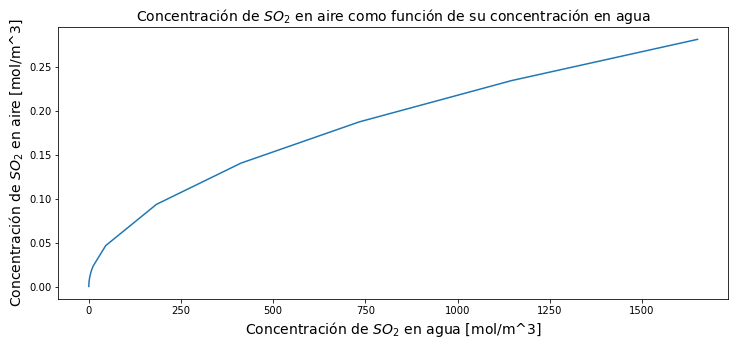

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df['Concentración SO2 en agua [mol/m^3]'],df['Concentración SO2 en aire [mol/m^3]'])
plt.xlabel(r'Concentración de $SO_{2}$ en agua [mol/m^3]',fontsize=14)
plt.ylabel(r'Concentración de $SO_{2}$ en aire [mol/m^3]',fontsize=14)
plt.title(r'Concentración de $SO_{2}$ en aire como función de su concentración en agua',fontsize=14)
plt.show()

Ahora, es necesario definir el vecindario de trabajo, para obtener la pendiente de la recta que permite aproximar el valor de $H$. Esto se realiza acotando por presiones parciales de forma que se obtengan los valores de interés que cumplan con tener presiones parciales de $\textrm{SO}_{2}$ que estén entre $0.4\textrm{ kPa}$ y $4\textrm{ kPa}$.

In [12]:
vecindario_trabajo=(df[0.4 < df['Presión parcial de SO2/kPa']])[df['Presión parcial de SO2/kPa']<4]

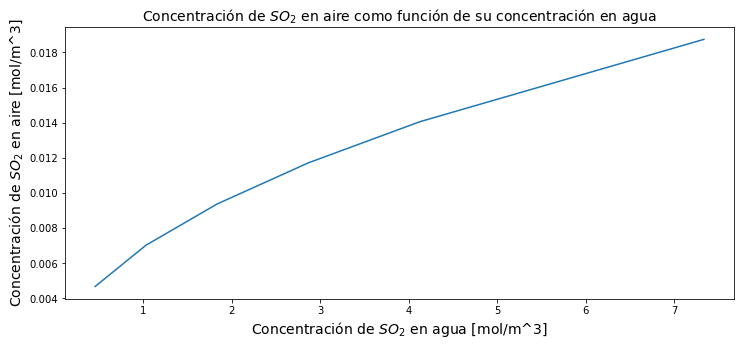

In [13]:
plt.figure(figsize=(12,5))
plt.plot(vecindario_trabajo['Concentración SO2 en agua [mol/m^3]'],vecindario_trabajo['Concentración SO2 en aire [mol/m^3]'])
plt.xlabel(r'Concentración de $SO_{2}$ en agua [mol/m^3]',fontsize=14)
plt.ylabel(r'Concentración de $SO_{2}$ en aire [mol/m^3]',fontsize=14)
plt.title(r'Concentración de $SO_{2}$ en aire como función de su concentración en agua',fontsize=14)
plt.show()

Con el vecindario de trabajo definido se puede realizar una regresión lineal que permita obtener la pendiente de la recta de mejor ajuste para los datos mostrados en la gráfica anterior.

In [14]:
res=linregress(vecindario_trabajo['Concentración SO2 en agua [mol/m^3]'].values,vecindario_trabajo['Concentración SO2 en aire [mol/m^3]'].values)
print('El valor de H:',res.slope)

El valor de H: 0.0019720419589169982


Por lo tanto, el valor de $H$ será de aproximadamente $0.001972$. Entonces, se puede proceder a calcular el $K_G$:

$$K_{G}=\frac{1}{k_G}+\frac{H}{k_{L}}$$

De donde recordando que $k_{G}=0.001758$ y $k_{L}=3.68\times10^{-5}$, se obtiene que:

$$K_{G}=0.001607$$

## Retomando el cálculo de $A_{t}$

Se puede retomar el cálculo del área lateral:

$$A_{t}=\frac{\dot{J}_{\textrm{SO}_{2}}^{T}}{K_{G}\Delta P_{LM}}$$

$$A_{t}=34.087\textrm{ m}^2$$

Y entonces, la altura:

$$A_{t}=\pi D h$$
$$h=\frac{A_{t}}{\pi D}$$
$$h=31.00\textrm{ m}$$

## Respuesta final

Se tiene entonces que cuando se selecciona un flujo de agua de $\sim75\textrm{ mol/s}$, con un diámetro de $0.35\textrm{ m}$, la altura de la columna es de $31\textrm{ m}$. Se podría escribir un código que permitiera encontrar el valor de la altura como función del diámetro siguiendo los pasos que aquí se realizaron y posteriormente se puede buscar obtener el diámetro para una altura determinada por medio de un método iterativo.

# Pregunta 2

Para una columna de $h=15\textrm{ m}$ y $D=0.1\textrm{ m}$ se desea comprobar si es capaz de realizar el proceso de extracción.

Para determinar si los parámetros de la columna de pared húmeda propuesta cumple con los requerimientos, se retoma que:

$$\dot{J}_{SO_2}^{T}= K_GA\Delta P_{LM}$$

Donde tendremos que:

-  Fuerza motriz ($\Delta P_{LM}$):

$$\Delta P_{LM} = 0.96479 \ kPa$$

-  Coeficiente global de transferencia de masa ($K_G$):

$$K_G = 0.001607$$

-  Área lateral de la columna (A):

$$A_t = \pi D h = 4.71\textrm{ m}^2$$

Calculamos el valor para los moles de $\textrm{SO}_2$ transferidos:

$$\dot{J}_{SO_2}^{T}= 0.0073\textrm{ mol/s}$$

Por lo que la columna no cumple.

# Referencias Bibliográficas

-  Barbooti, M. M., Ibraheem, N. K., & Ankosh, A. H. (2011). Removal of Nitrogen Dioxide and Sulfur Dioxide from Air Streams by Absorption in Urea Solution. Journal of Environmental Protection, 02(02), 175–185. https://doi.org/10.4236/JEP.2011.22020
-  Green, D. W., & Southard, M. Z. (2019). Perry´s chemical engineering handbook (G. Don W. (ed.); 9th ed.). McGraw-Hill Education.
-  Karamian, S., Mowla, D., & Esmaeilzadeh, F. (2019). The effiect of various nanofluids on absorption intensification of CO2/SO2 in a single-bubble column. Processes, 7(7). https://doi.org/10.3390/pr7070393
-  Li, X., Zhu, C., Lu, S., & Ma, Y. (2012). MASS TRANSFER OF SO 2 ABSORPTION WITH AN INSTANTANEOUS CHEMICAL REACTION IN A BUBBLE COLUMN. Brazilian Journal of Chemical Engineering, 30(03), 551–562. www.abeq.org.br/bjche
-  Perry, R. H., Maloney, J. O., & Green, D. W. (1997). Perry’s chemical engineers’ handbook. https://books.google.com/books/about/Perry_s_Chemical_Engineers_Handbook.html?id=9h69MgEACAAJ
-  Yongtao, Y., NingPing, Guangfei, Q., Junyan, L., & Qian, Z. (2015). Remove Sulfur Dioxide from Flue Gases to Obtain Sulfuric Acid through Electrodialysis Enrichment. Journal of The Electrochemical Society, 162(9), E141–E147. https://doi.org/10.1149/2.0591509JES